**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: Armando Cerda
*   MATRÍCULA: A01570376

*   NOMBRE: Christopher Parga
*   MATRÍCULA: A00818942

*   NOMBRE: Julio Ruiz
*   MATRÍCULA: A01794742

*   NOMBRE: Mayra Cabrera
*   MATRÍCULA: A01795439

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [4]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [5]:
data_df.describe(include='all') 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [6]:
for column in data_df.columns:
    print(f"{column}: {data_df[column].nunique()} -  {data_df[column].unique()[:5]} \n")
    

diagnosis: 2 -  ['M' 'B'] 

radius_mean: 456 -  [17.99 20.57 19.69 11.42 20.29] 

texture_mean: 479 -  [10.38 17.77 21.25 20.38 14.34] 

perimeter_mean: 522 -  [122.8  132.9  130.    77.58 135.1 ] 

area_mean: 539 -  [1001.  1326.  1203.   386.1 1297. ] 

smoothness_mean: 474 -  [0.1184  0.08474 0.1096  0.1425  0.1003 ] 

compactness_mean: 537 -  [0.2776  0.07864 0.1599  0.2839  0.1328 ] 

concavity_mean: 537 -  [0.3001 0.0869 0.1974 0.2414 0.198 ] 

concave points_mean: 542 -  [0.1471  0.07017 0.1279  0.1052  0.1043 ] 

symmetry_mean: 432 -  [0.2419 0.1812 0.2069 0.2597 0.1809] 

fractal_dimension_mean: 499 -  [0.07871 0.05667 0.05999 0.09744 0.05883] 

radius_se: 540 -  [1.095  0.5435 0.7456 0.4956 0.7572] 

texture_se: 519 -  [0.9053 0.7339 0.7869 1.156  0.7813] 

perimeter_se: 533 -  [8.589 3.398 4.585 3.445 5.438] 

area_se: 528 -  [153.4   74.08  94.03  27.23  94.44] 

smoothness_se: 547 -  [0.006399 0.005225 0.00615  0.00911  0.01149 ] 

compactness_se: 541 -  [0.04904 0.01308 0

1c) Búsqueda de valores faltantes.

In [7]:
print("\nValores Faltantes:\n", data_df.isnull().sum())



Valores Faltantes:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

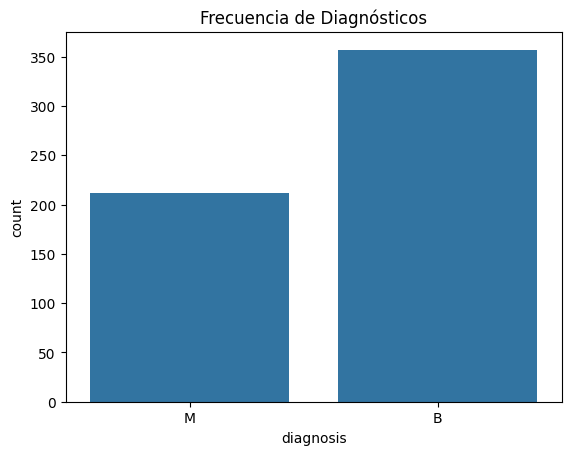

In [8]:
sns.countplot(x='diagnosis', data=data_df)
plt.title("Frecuencia de Diagnósticos")
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

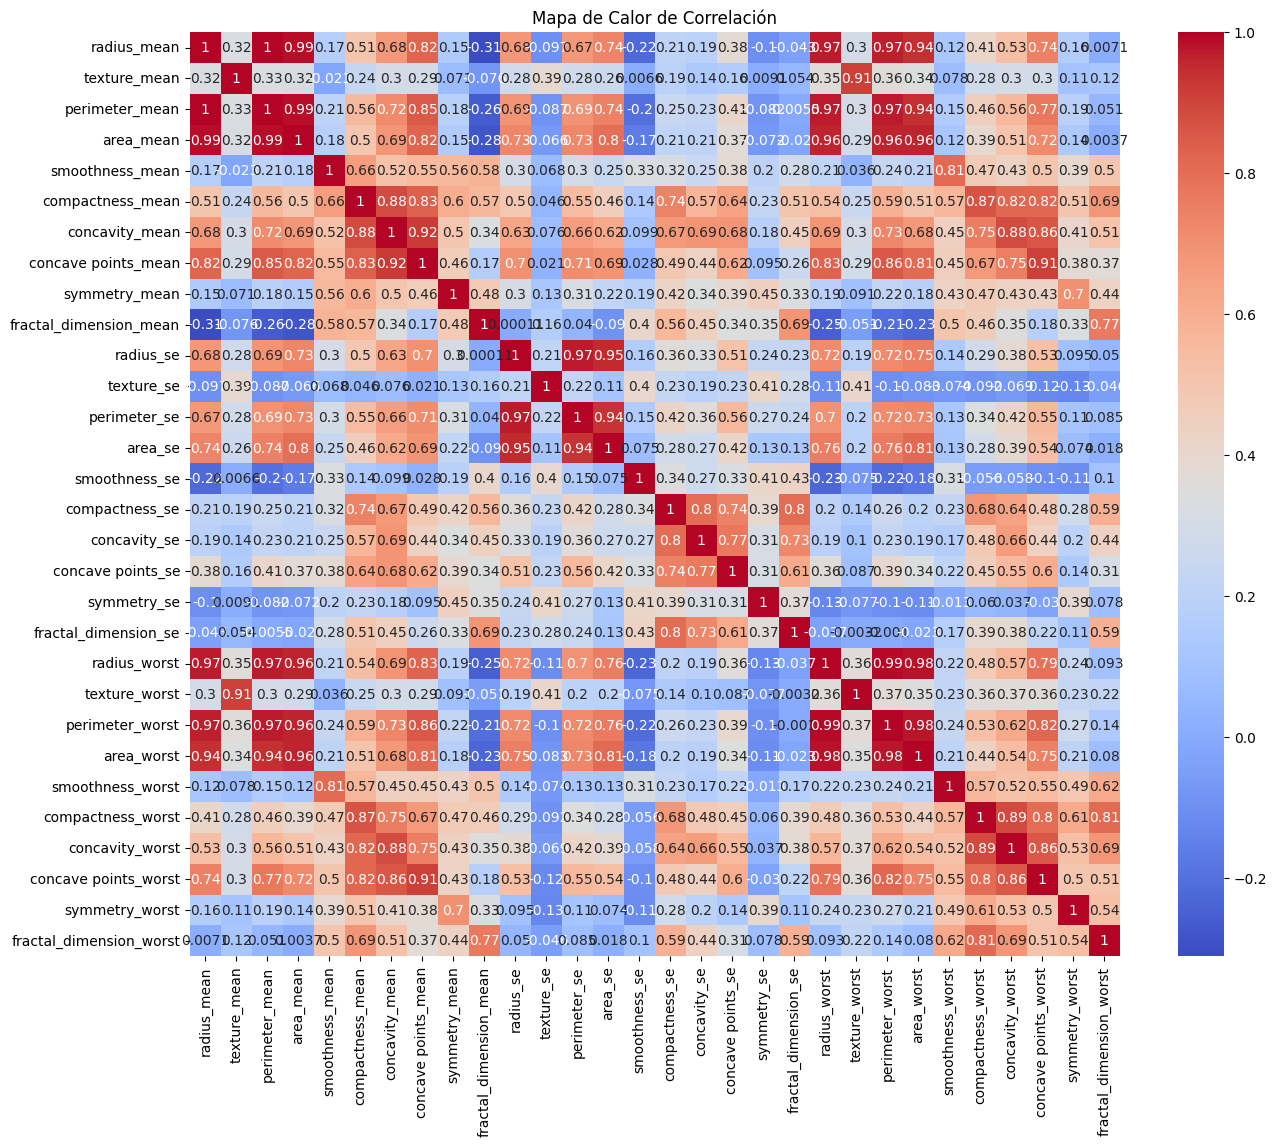

In [9]:
plt.figure(figsize=(15, 12))
sns.heatmap(data_df.corr(numeric_only=True), annot=True, square=False, cmap='coolwarm')
plt.title("Mapa de Calor de Correlación")
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

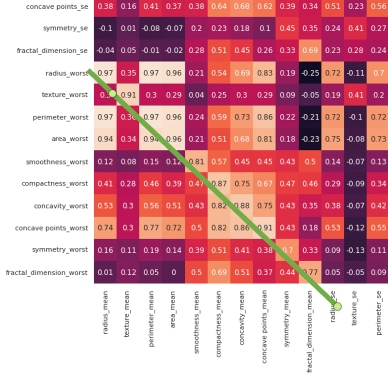

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [10]:
data_df = data_df[data_df.columns.drop(list(data_df.filter(regex='_worst')))]
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




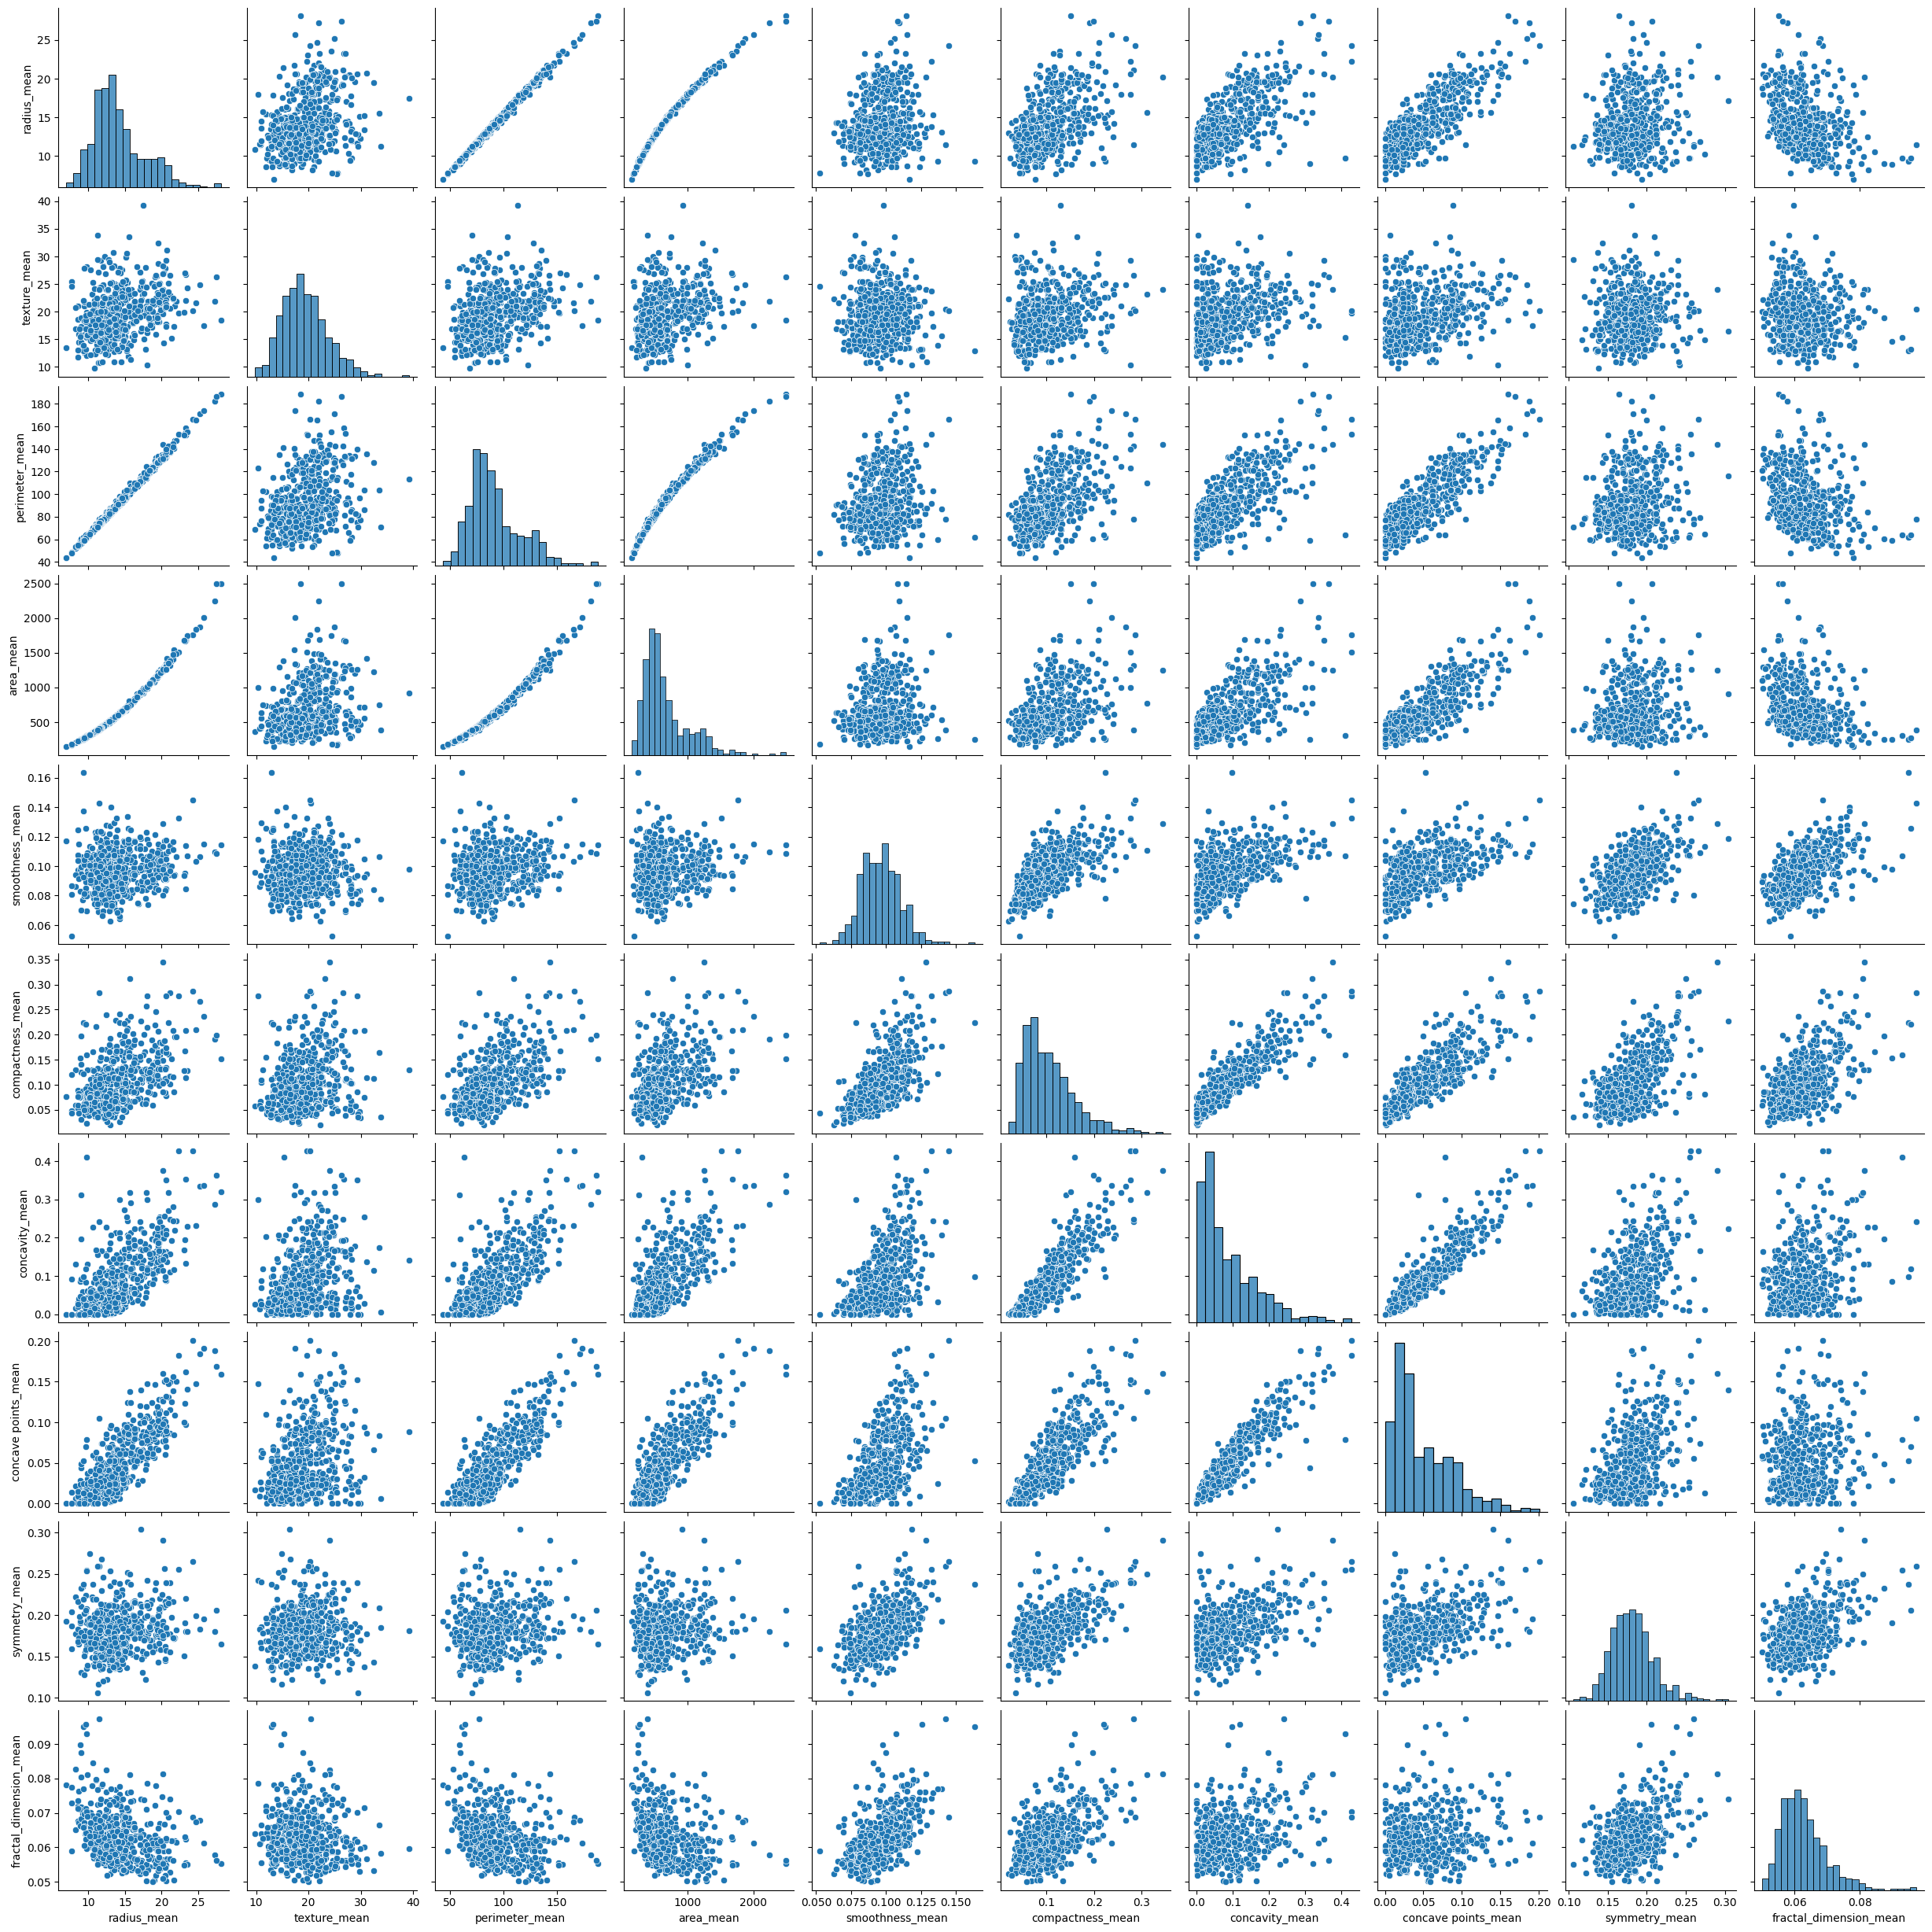

In [11]:
sns.pairplot(data=data_df[['radius_mean',  'texture_mean', 
 'perimeter_mean', 
'area_mean', 
'smoothness_mean', 
 'compactness_mean', 
'concavity_mean',
 'concave points_mean', 
'symmetry_mean', 
 'fractal_dimension_mean']]) 
plt.show()


De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


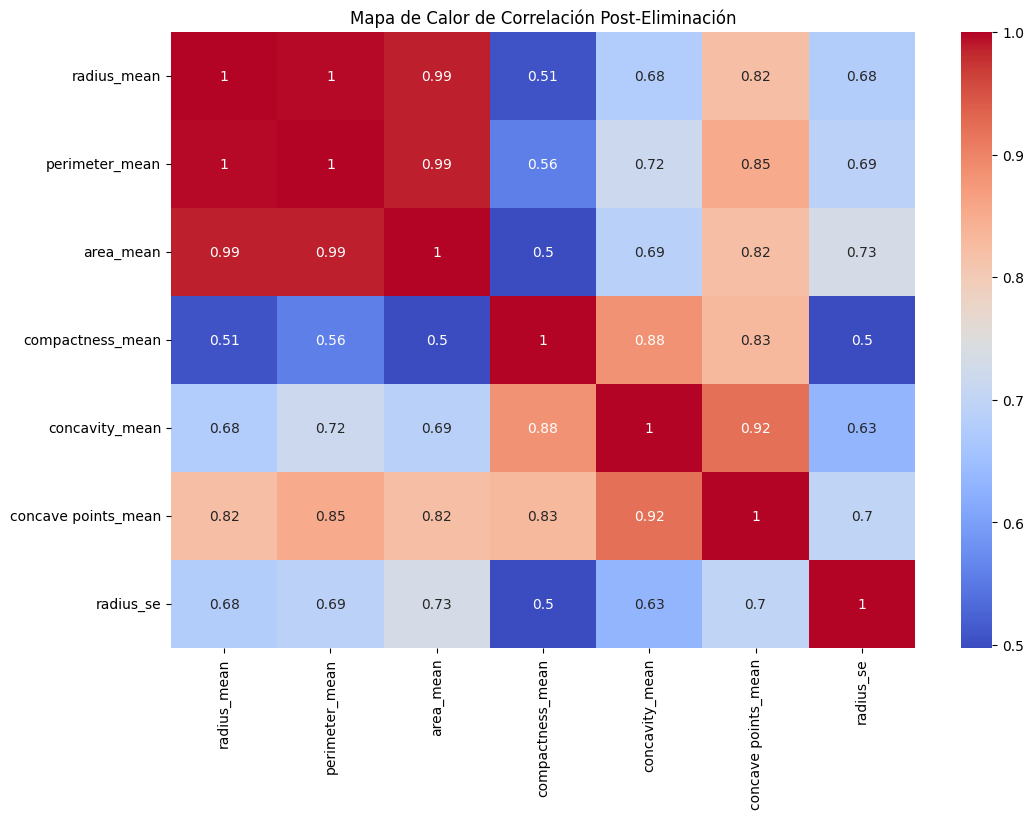

In [12]:

plt.figure(figsize=(12, 8))
sns.heatmap(data_df[['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','radius_se']].corr(numeric_only=True), annot=True, square=False, cmap='coolwarm')
plt.title("Mapa de Calor de Correlación Post-Eliminación")
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [13]:
data_df.filter(regex='_se').columns 

Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [14]:
data_df.filter(regex='_mean').columns 

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [15]:
variables_to_drop = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
                     'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']
data_df = data_df.drop(columns=variables_to_drop)
data_df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
926682,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
926954,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

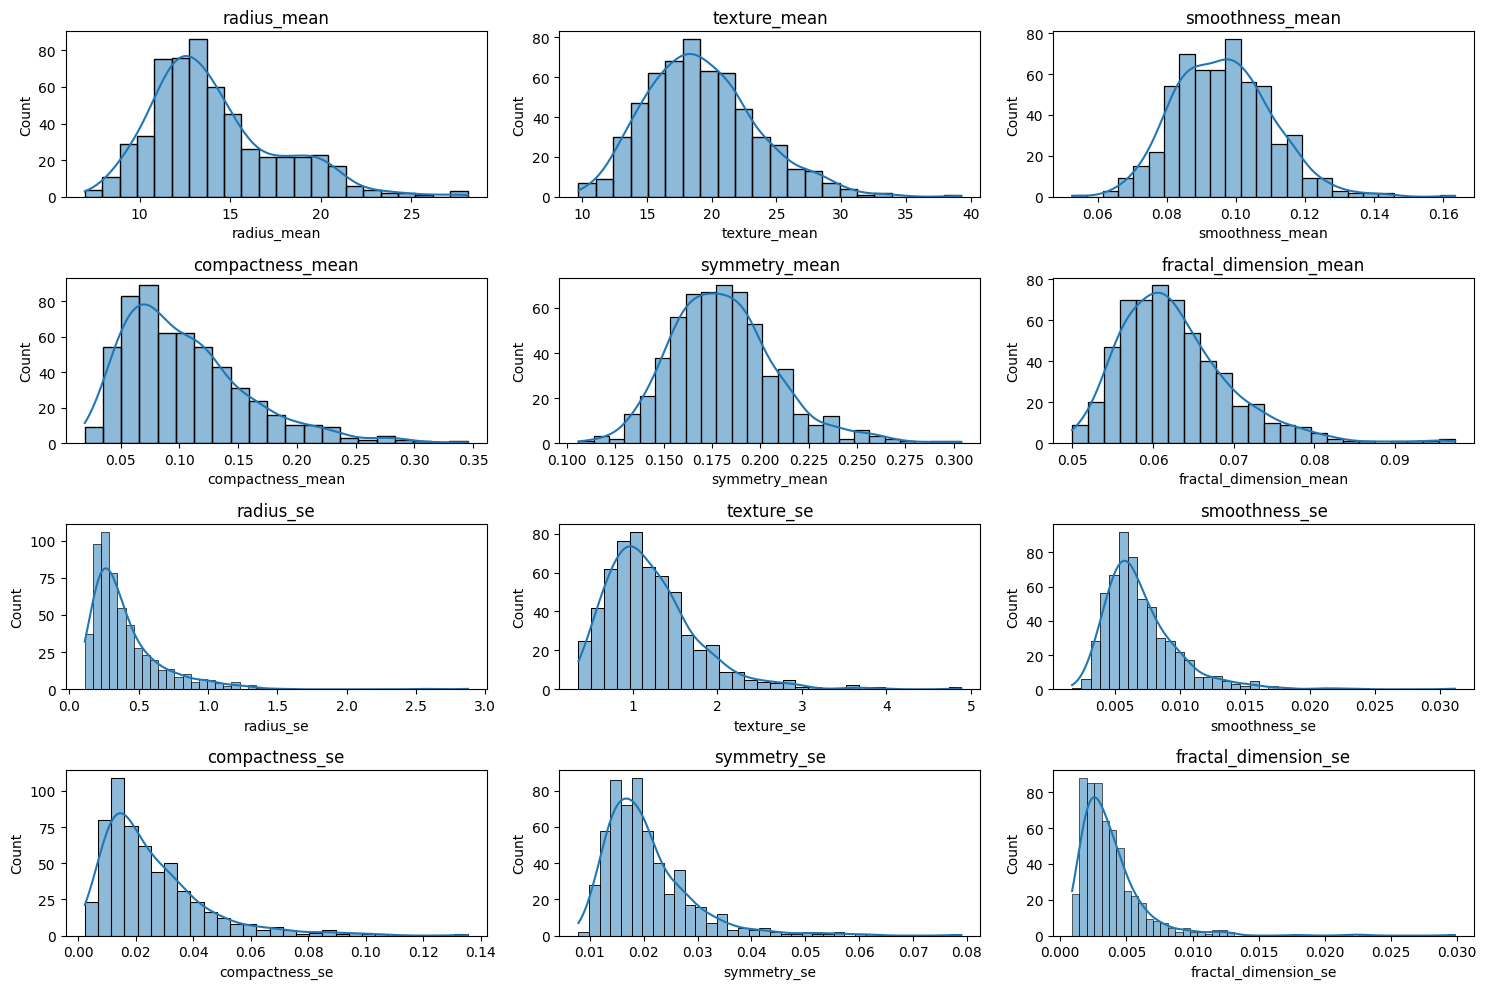

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

In [16]:
from scipy.stats import skew

plt.figure(figsize=(15, 10))
for i, col in enumerate(data_df.select_dtypes(include=['int64', 'float64']).columns):  
    plt.subplot(4, 3, i+1)
    sns.histplot(data_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

skew_cols = [col for col in data_df.select_dtypes(include=['int64', 'float64']).columns if skew(data_df[col]) > 1]
skew_cols

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


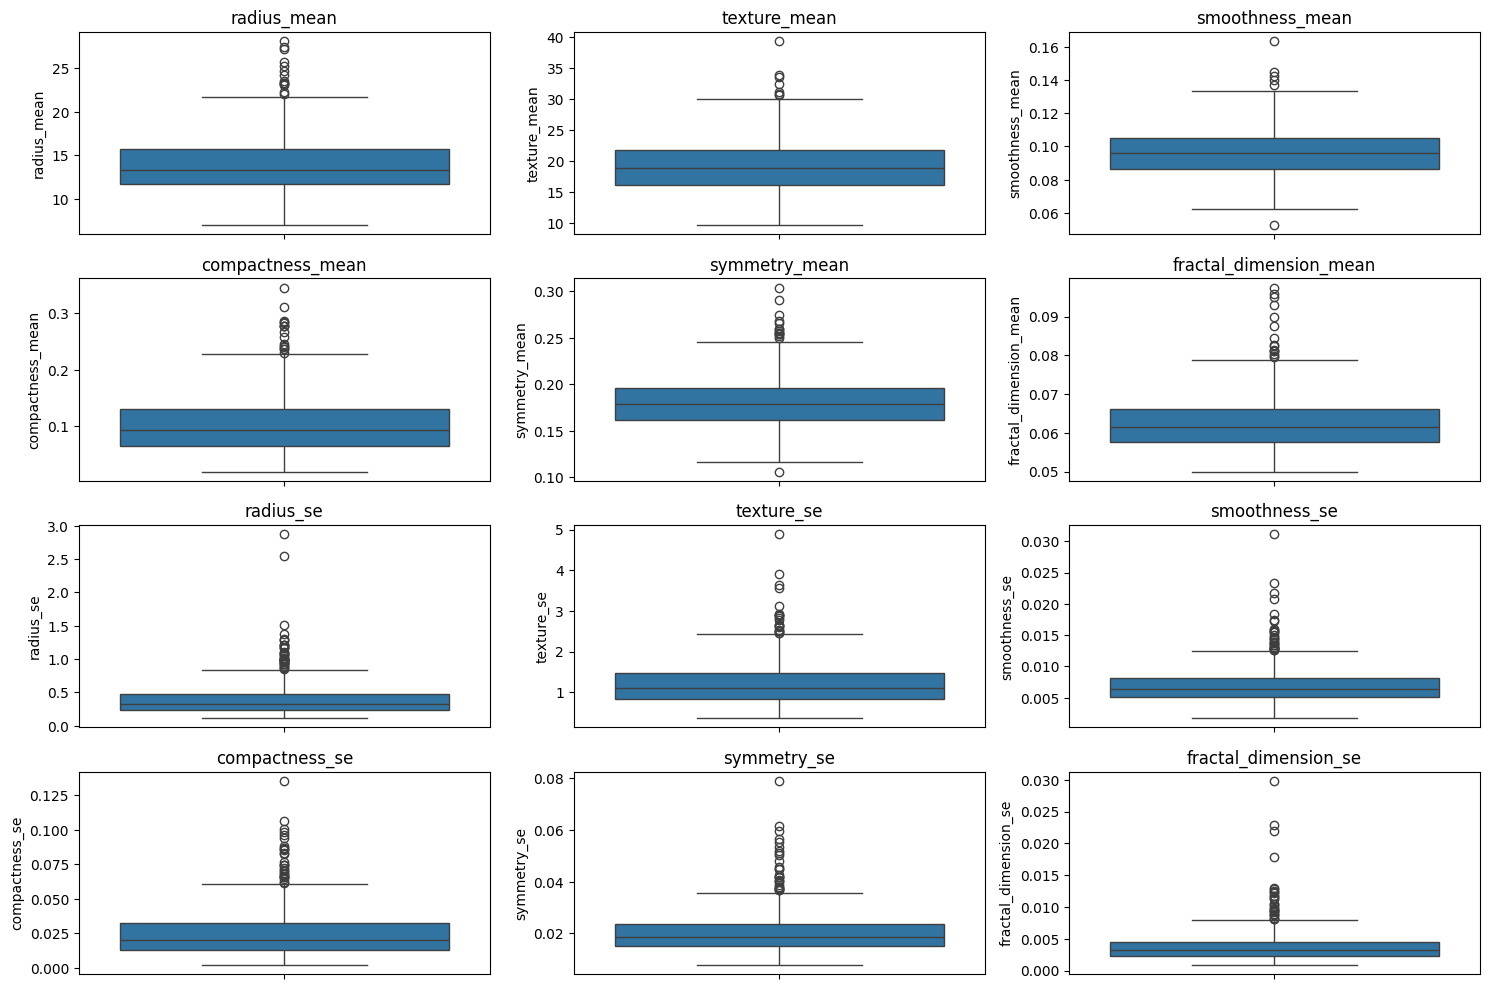

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data_df.select_dtypes(include=['int64', 'float64']).columns):    
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=data_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

scale_cols = [col for col in data_df.select_dtypes(include=['int64', 'float64']).columns if data_df[col].min() < 0 or data_df[col].max() > 1]
scale_cols

In [18]:
keep_columns = data_df.columns.tolist()
keep_columns

['diagnosis',
 'radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [19]:
from sklearn.model_selection import train_test_split


data_df = pd.read_csv('data.csv')
data_df.set_index('id',inplace=True)

X = data_df.drop(columns=['diagnosis'])
y = data_df['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [20]:
from sklearn.compose import ColumnTransformer


preprocessing = ColumnTransformer(
    [('remove', 'drop', variables_to_drop + list(data_df.filter(regex='_worst')) )],
    remainder='passthrough'
)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logr_model = Pipeline(steps=[('preprocessor', preprocessing),
                             ('classifier', LogisticRegression())])
logr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('remove', 'drop',
                                                  ['perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('classifier', LogisticRegression())])

In [22]:
y_pred = logr_model.predict(X_test)


In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print("Matriz de Confusión:\n", conf_matrix)
print("Precisión:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Matriz de Confusión:
 [[68  4]
 [10 32]]
Precisión: 0.8888888888888888
Recall: 0.7619047619047619
Accuracy: 0.8771929824561403


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [24]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)
minmax_scaler = MinMaxScaler()

preprocessing = ColumnTransformer(
    [
        ('remove', 'drop', variables_to_drop + list(data_df.filter(regex='_worst'))), 
        ('sqrt_transform', sqrt_transformer, skew_cols), 
        ('minmax_scale', minmax_scaler, scale_cols) 
    ],
    remainder='passthrough' 
)

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [25]:
logr_model2 = Pipeline(steps=[('preprocessor', preprocessing),
                              ('classifier', LogisticRegression())])

In [26]:
logr_model2.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('remove', 'drop',
                                                  ['perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst'...
                                                   'fractal_dimension_worst']),
                                                 ('sqrt_transform',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['compactness_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se']),
                                                 ('minmax_scale',
                                                  MinMaxScaler(),
                                                  ['radius_mean',
                                                   'texture_mean', 'radius_se',
                                                   'texture_se'])])),
                ('classifier', LogisticRegression())])

In [27]:
y_pred2 = logr_model2.predict(X_test)


In [28]:
conf_matrix2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, pos_label=1)
recall2 = recall_score(y_test, y_pred2, pos_label=1)

print("Matriz de Confusión:\n", conf_matrix2)
print("Precisión:", precision2)
print("Recall:", recall2)
print("Accuracy:", accuracy2)

Matriz de Confusión:
 [[72  0]
 [11 31]]
Precisión: 1.0
Recall: 0.7380952380952381
Accuracy: 0.9035087719298246


# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [29]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

n_components = pca.n_components_
n_components

17

In [31]:
exp_var_cum = np.cumsum(pca.explained_variance_ratio_)

In [32]:
j = 1
for i in pca.explained_variance_ratio_:
    print(f'The percentage of vaciance explained by principal component {j} is {np.round(i * 100,2)}%')
    j = j + 1

The percentage of vaciance explained by principal component 1 is 44.27%
The percentage of vaciance explained by principal component 2 is 18.97%
The percentage of vaciance explained by principal component 3 is 9.39%
The percentage of vaciance explained by principal component 4 is 6.6%
The percentage of vaciance explained by principal component 5 is 5.5%
The percentage of vaciance explained by principal component 6 is 4.02%
The percentage of vaciance explained by principal component 7 is 2.25%
The percentage of vaciance explained by principal component 8 is 1.59%
The percentage of vaciance explained by principal component 9 is 1.39%
The percentage of vaciance explained by principal component 10 is 1.17%
The percentage of vaciance explained by principal component 11 is 0.98%
The percentage of vaciance explained by principal component 12 is 0.87%
The percentage of vaciance explained by principal component 13 is 0.8%
The percentage of vaciance explained by principal component 14 is 0.52%
Th

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [33]:
logr_model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('classifier', LogisticRegression())
])

In [34]:
logr_model3.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=17)),
                ('classifier', LogisticRegression())])

In [35]:
y_pred3 = logr_model3.predict(X_test)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3, pos_label=1)
recall3 = recall_score(y_test, y_pred3, pos_label=1)

print("Matriz de Confusión:\n", conf_matrix3)
print("Precisión:", precision3)
print("Recall:", recall3)
print("Accuracy:", accuracy3)

Matriz de Confusión:
 [[72  0]
 [ 2 40]]
Precisión: 1.0
Recall: 0.9523809523809523
Accuracy: 0.9824561403508771


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

el recall.
Un alto recall implica que mi modelo puede identificar correctamente un buen porcentaje de casos positivos reales

Treshold
Si disminuye, se volvéra propenso a más resultados positivos. Si se aumenta se vuelve más reservador para dar resultados positivos. Se tendría que ajustar el threshold con base a donde es mejor el ajuste hacia recall.


In [36]:
from sklearn.metrics import roc_curve

def encontrar_umbral_optimo(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

def evaluar_modelo_con_umbral(model, threshold, X_test, y_test):
    y_pred_optimal = np.where(model.predict_proba(X_test)[:, 1] >= threshold, 1, 0)
    conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
    accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
    precision_optimal = precision_score(y_test, y_pred_optimal, pos_label=1)
    recall_optimal = recall_score(y_test, y_pred_optimal, pos_label=1)

    print("Matriz de Confusión:\n", conf_matrix_optimal)
    print("Precisión:", precision_optimal)
    print("Recall:", recall_optimal)
    print("Accuracy:", accuracy_optimal)
    print("\n")


umbral_logr_model = encontrar_umbral_optimo(logr_model, X_test, y_test)
evaluar_modelo_con_umbral(logr_model, umbral_logr_model, X_test, y_test)


umbral_logr_model = encontrar_umbral_optimo(logr_model2, X_test, y_test)
evaluar_modelo_con_umbral(logr_model2, umbral_logr_model, X_test, y_test)

umbral_logr_model = encontrar_umbral_optimo(logr_model3, X_test, y_test)
evaluar_modelo_con_umbral(logr_model3, umbral_logr_model, X_test, y_test)

Matriz de Confusión:
 [[68  4]
 [10 32]]
Precisión: 0.8888888888888888
Recall: 0.7619047619047619
Accuracy: 0.8771929824561403


Matriz de Confusión:
 [[69  3]
 [ 7 35]]
Precisión: 0.9210526315789473
Recall: 0.8333333333333334
Accuracy: 0.9122807017543859


Matriz de Confusión:
 [[72  0]
 [ 2 40]]
Precisión: 1.0
Recall: 0.9523809523809523
Accuracy: 0.9824561403508771


